<a href="https://colab.research.google.com/github/kyere7/AncientSecretsOfComputerVision/blob/main/AncientSecretsOfComputerVision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> Ancients Secrets of Computer Vision 🤖</h1>  

<b>Course description:</b>  
This is a computer vision course design by professor Joseph Redmond, inventor of the "YOLO" algorithm in computer vision.  
The class gives a thorough explanation of concepts and techniques in computer vision.

<b>My Goal:</b>  
After finishing this course, I will have understood the important concepts and theories behind computer vision and it's techniques.  
I will have had a fair exposure to opencv (python's library for computer vision), PyTorch, and different machine learning models in Python, since I will be praticing implementation of the techniques and concepts🦾.  

<i>Course Link:</i> https://youtube.com/playlist?list=PLjMXczUzEYcHvw5YYSU92WrY8IwhTuq7p&si=7exAnnC3u3exoL9v

<i>**Let's get started!!! 🛫**</i>

### Lecture 1 -- Introduction

<b> What is Computer Vision? </b>
  - Basically making computers see and understand what the human eyes can see.

**Levels of computer vision:**  
- Low level vision:  
    - Resizing: making a small patch in an image bigger. Nearest-neighbor resampling(fast), bilinear.  
    -	Image processing (exposure, hue, saturation, edges, etc...) :edge
    -	Using edge detection and stuff we can extract some useful features for our computer detection model.

- Mid-level vision:  
    -	Panaroma stitching – combining images into one image 🪡
    -	Connecting images with our knowledge of the real world.
    -	Multi-view stereo

- High-level vision:
  -	Semantics into the vision system ---computer understanding what’s going on in the images.
  -	Classification – identifying what is in an image (more suited for my project)
  -	Object detection – identifying different things in an image. 🔎


**Making a grayscale image using opencv**

In [ ]:
import cv2 as cv

# converting rgb image to grayscale
img = cv.imread("/content/spongebob.webp")

gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv.imwrite('Gray.jpg', gray_img)


### Lecture 2 -- Human Vision

-	Humans have complex eyes 👀
-	Rods suited for night vision (fewer light photons to activate) – peripheral vision
-	Cones for day vision because they need more photons to activate
-	Fovea small circle on the retina with cones
-	Micro saccades – short linear movements, sporadic
-	Ocular drift – constant slow movement
-	Microtremors – tiny vibrations
-	Compression of photons before transmitting to the brain by ganglia.
-	Ventral and dorsal vision system
-	Color of an object depends on incidence and reflectance
-	Illumination * reflectance = color signal


### Lecture 3 -- Images

-	Tensors are matrices (pixel blocks) with separate pixel blocks for red, blue, and red values for each individual pixel in each block.
-	RGB is not always clear for analysis (colors might not really pop out), so we can use Hue Saturation Value.
-	More saturation = more intense colors
- A pixel can be referenced using the xy (row, height) indexing for a 2D and CHW (channel, height, width) a 3D tensor image (haiving rgb values).
- Interpolation techniques
  - Nearest-neighbor resampling (straightforward, but can get a blocky image)
  - Triangle interpolation - interpolating based on the area of the nearest 3 triangular-shape pixels around the pixel.
  - Bilinear - A rectangular pixel shape interpolation (linear interpolation between two linear interpolations)
  - Bicubic - A cubic pixel shape interpolation

### Lecture 4 -- resizing, filtering, and convolutions

-	Interpolation is used for resizing an image
-	Bilinear interpolation considers the size of opposite rectangle
-	Resizing down with bilinear or bicubic interpolation can have some noise – to solve it, we use averaging.
-	In averaging, we add up the nearest pixels and divide it by how many pixels there are total
-	Convolution – taking a filter/kernel and multiplying all the entries of the pixels in an image piecewise
-	The output is just a pixel of the weighted average of the applied filter (nearby pixels).
- Box filters are used for smoothing images.
- And after applying the filter, we can resize and get a better resized image because pixels are the weighted averages of the surrounding pixels.
- Why ❓ -- filtering helps with feature extraction and removing noise from the image.
- Gaussians are better at smoothing images -- far away things don't contribute much to the kernel, but as you get closer to the mean they ramp up contribution. This way there is less artifacts.
- What filtering really is; taking a kernel and centering it on one center pixel and the output pixel is the weighted average of the kernel and surrounding pixels (including that central pixel) of the central pixel 💡.
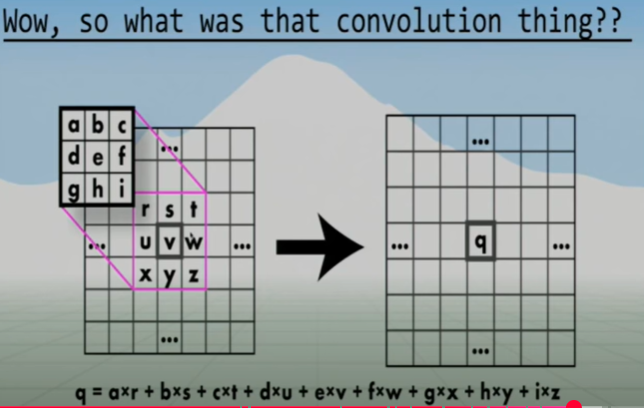

- We want a kernel that adds up to 1.
- However a highpass kernel, where the kernel adds up to **0** is used for edge detection.
- Sharpen kernel is a combination of edge detection and identity kernels (add up to 1 --which is centered in the kernel).
- Styling kernel (Emboss).
- Soble Kernels: edges and gradients -- hard edges and direction they're facing.
- Nueral networks basically apply convolutions on convoluted images. (convolution operations built upon outputs of convoluted images).

<b>Bicubic interpolation using opencv</b>

In [ ]:
# making a bicubic interpolation of image
img = cv.imread("/content/spongebob.webp")

bicubic_img = cv.resize(img, None, fx=2, fy=2, interpolation=cv.INTER_CUBIC) # fx and fy are new heights
cv.imwrite('Bicubic.jpg', bicubic_img)

**convolution using opencv and numpy**

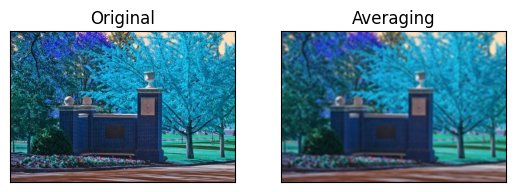

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image
img = cv2.imread('/content/download.jpg')

# Define a 5x5 averaging kernel
kernel = np.ones((5,5),np.float32)/25

# Apply the convolution
dst = cv2.filter2D(img,-1,kernel)

# Display the original and filtered images
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()


### Lecture 5 -- Edges and Features

- Convolutions are used for edge detection and features.  
- Image is a function and edges are the rapid changes in this function.  
- Taking derivative of the function and the peak of the function indicates a possible edge.  
- We don't have an actual function, so we estimate using a possible h=2 value for (f(a+h)-f(a)) / h.
- Challenge: image becomes noisy.
- Therefore a gaussian blur is used for a smoother image. ✅
- For edge detection, we wanna look for places where the second derivative crosses zero, that way we don't have toworry about where the peak is highest or lowest.
- Laplacian can be used instead of actual second derivative. ❗
- Laplacian is also sensitive to noise so we could smooth with gaussian blur first.
- good approximations with 5\*5 - 9\*9 kernels.
- Aother method is using frequency changes in the image function. High frequency changes correlate to edges.
- **Difference of gaussians**: is subtracting "the blur" image from the less blur image. Useful for separating high and low frequency components.
- **gradient magnitude**: don't need 2nd derivatives.
- **Canny edge detection**:  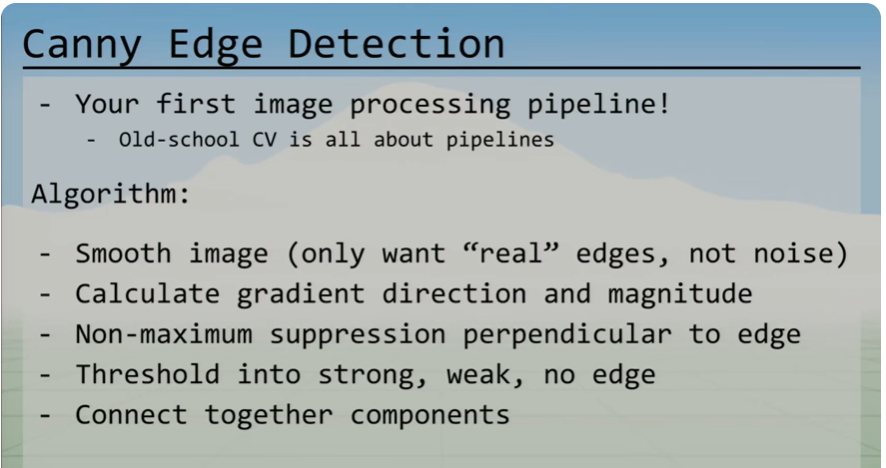
  
\* gradient magnitude and direction is by using sobel filters  
- Threshold edges: only want strong edges. Weak edges are edges if they connect to strong.
- What makes a good **feature**? -- wanna find patches of an image that are the same in another image.
- how close are two patches? -- we can find this using sum squared difference.
- how about unique pathes? -- corners are better than edges (techniques)
- **corners** have mostly high self-difference.

**doing a difference of gaussian with open cv**

In [ ]:
image  = cv.imread('/content/download.jpg')

In [ ]:
# converting to grayscale
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

In [ ]:
# apply gaussian blur twice with different sigmas
blurred1 = cv.GaussianBlur(gray, (5,5), 1)
blurred2 = cv.GaussianBlur(gray, (5,5), 3)

In [ ]:
diffOfGaussians = blurred1 - blurred2
cv.imshow('Difference of Gaussians', diffOfGaussians)

**gradient magnitude using open cv**

In [ ]:
import cv2 as cv
import numpy as np

# Load the image and convert to grayscale
image = cv.imread('image')  # Replace with your image file
gray_image = cv.cvtColor(image, cv.COLOR_BGRGRAY)

# Calculate horizontal and vertical derivatives (using Sobel)
grad_x = cv.Sobel(gray_image, cv.CV_3F, 1, 0)
grad_y = cv.Sobel(gray_image, cv.CV_3F, 0, 1)

# Calculate the gradient magnitude
magnitude = cv.magnitude(grad_x, grad_y)

# Normalize the magnitude for display
magnitude = cv.normalize(magnitude, None, 0, 55, cv.NORM_MINMAX, cv.CV_8U)

# Display the original and gradient magnitude images
cv.imshow('Original Image', gray_image)
cv.imshow('Gradient Magnitude', magnitude)

### Lecture 6 -- Features, matching, and RANSAC

- Features are areas or patches of the image that are unique ✂
- Using the sum squared difference helps us to find these patches
- Corners are best ways of finding the unique patches
- Using self-difference we can shift corners and look at how much unique it is
- Self-difference is still expensive--need approximation 🪙
- Structure matrix can help summarize the distribution of the gradients nearby
- Need to transform between images after finding features.
- Matching patches; descriptors -- take distance between patch pixels and of the distance function is low, we say they might probably be a match
- Projective transformations are better for mapping coordinates for panaroma stitching

**OpenCV to do a homography transformation**

cv2::findHomography(srcPoints, dstPoints, method, ransacReprojThreshold)

### Lecture 7 -- Matching, RANSAC, SIFT, and HOG

- Harris Corner detection; calculate derivatives, calculate 3 measures,calculate weighted sums (gaussian), estimate response based on the smallest eigen value, non-max supression.
- least squares are very bad at handling outliers in data
- RANSAC (RANdom SAmple Consensus) -- Inliers will agree , outliers are basically random and will not agree
- RANSAC picks two points and draws a line and all points that fall in some area bound are considered inliers and rest of the points would be outliers for the model. We try this a couple times to find the model with the most inliers and that will be our line or best model. 🔗
- Panaroma algorithm; find corners, calculate descriptors, match descriptors, RANSAC to find homography, stitch together images. 🧵
- Panaroma starts to fail with more images on a plane.
- We fix this with by projecting on to a cylindrical plane and stitching together
- Issues: descriptors not invariant to lighting changes.
- Fix? -- using a descriptor called Histogram of Oriented Gradients *(HOG)*.
- **HOG** is not relevant to magnitude of gradient vectors, just direction.
- Scale Invariant Feature Transform **(SIFT)** -- finds keypoints and extract rotation-invariant descriptors.
- 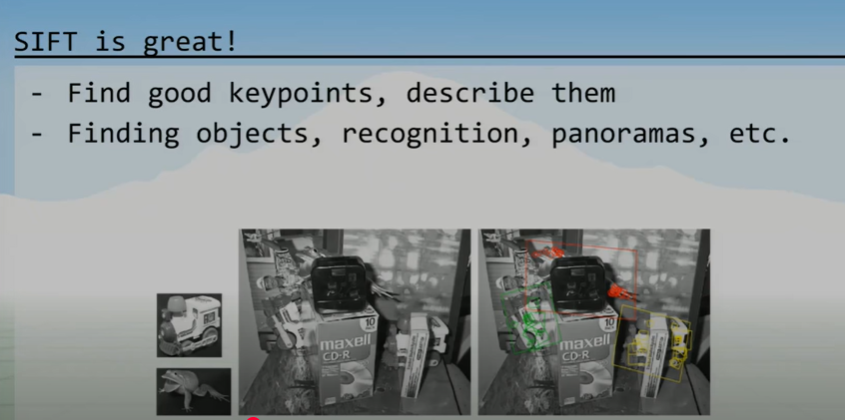

**Image stitching with OpenCV (example)**

In [ ]:
import cv2
import numpy as np

# Assuming you have a list of image paths called 'image_paths'
image_paths = ['image1.jpg', 'image2.jpg', 'image3.jpg', "..."]

# Read images and convert to RGB
images = []
for img_path in image_paths:
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    images.append(img)

# Create a Stitcher object
stitcher = cv2.Stitcher_create()

# Stitch the images
(status, stitched_img) = stitcher.stitch(images)

if status == cv2.Stitcher_OK:
    # Display or save the stitched image
    stitched_img = cv2.cvtColor(stitched_img, cv2.COLOR_RGB2BGR)
    cv2.imshow("Stitched Panorama", stitched_img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
else:
    print(f"Panorama stitching failed: {status}")

**SIFT in opencv**

In [ ]:
import numpy as np
import cv2 as cv

img = cv.imread('/content/small-village-big-moutain-260nw-1493640845.webp')
gray= cv.cvtColor(img,cv.COLOR_BGR2GRAY)

sift = cv.SIFT_create()
kp = sift.detect(gray,None)

img=cv.drawKeypoints(gray,kp,img)

cv.imwrite('sift_keypoints.jpg',img)

True

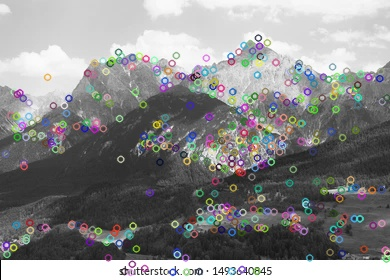

## Lecture 8 -- Optical Flow

- HOG is a better image descriptor; compute gradients, bin gradients, aggregate blocks, normalize gradient magnitudes.
- Optical flow is movement -- whether camera movement or object movement in the images.
- Optical flow can be used for object tracking, motion estimation, etc.
- Disadvantages of feature matching for optical flow;
  - sparse
  - feature alignment not exact,
  - low accuracy.
  - Overall, feature matching doesn't work well for optical flow.
- Lucas-Kanade optical flow **;** assuming objects move by delta p over delta t.
  - Approximate with first order Taylor expansion.
  - Corners are best features for optical flow because they give you more gradient

- When does Lucas-Kanade fail ⁉ ----
  - Lighting changes
  - Large movements
  - Specularities
  - Aperture problem (eg barber illusion pole)

- Improving LK: Iterative LK, Image pyramids.
- Farneback optical flow algorithm --- two frame motion estimation based on polynomial expansion.

**Lucas-Kanade optical flow in opencv**

In [ ]:
import numpy as np
import cv2 as cv
import argparse
parser = argparse.ArgumentParser(description='This sample demonstrates Lucas-Kanade Optical Flow calculation. \
                                              The example file can be downloaded from: \
                                              https://www.bogotobogo.com/python/OpenCV_Python/images/mean_shift_tracking/slow_traffic_small.mp4')
parser.add_argument('image', type=str, help='path to image file')
args = parser.parse_args()
cap = cv.VideoCapture(args.image)
# params for ShiTomasi corner detection
feature_params = dict( maxCorners = 100,
                       qualityLevel = 0.3,
                       minDistance = 7,
                       blockSize = 7 )
# Parameters for lucas kanade optical flow
lk_params = dict( winSize  = (15, 15),
                  maxLevel = 2,
                  criteria = (cv.TERM_CRITERIA_EPS | cv.TERM_CRITERIA_COUNT, 10, 0.03))
# Create some random colors
color = np.random.randint(0, 255, (100, 3))
# Take first frame and find corners in it
ret, old_frame = cap.read()
old_gray = cv.cvtColor(old_frame, cv.COLOR_BGR2GRAY)
p0 = cv.goodFeaturesToTrack(old_gray, mask = None, **feature_params)
# Create a mask image for drawing purposes
mask = np.zeros_like(old_frame)
while(1):
    ret, frame = cap.read()
    if not ret:
        print('No frames grabbed!')
        break
    frame_gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    # calculate optical flow
    p1, st, err = cv.calcOpticalFlowPyrLK(old_gray, frame_gray, p0, None, **lk_params)
    # Select good points
    if p1 is not None:
        good_new = p1[st==1]
        good_old = p0[st==1]
    # draw the tracks
    for i, (new, old) in enumerate(zip(good_new, good_old)):
        a, b = new.ravel()
        c, d = old.ravel()
        mask = cv.line(mask, (int(a), int(b)), (int(c), int(d)), color[i].tolist(), 2)
        frame = cv.circle(frame, (int(a), int(b)), 5, color[i].tolist(), -1)
    img = cv.add(frame, mask)
    cv.imshow('frame', img)
    k = cv.waitKey(30) & 0xff
    if k == 27:
        break
    # Now update the previous frame and previous points
    old_gray = frame_gray.copy()
    p0 = good_new.reshape(-1, 1, 2)
cv.destroyAllWindows()

**Farneback dense optical flow opencv**

In [ ]:
 cv2.calcOpticalFlowFarneback(
     prev, next, pyr_scale, levels, winsize,
     iterations, poly_n, poly_sigma, flags[, flow])

Parameters:

prev : First input image in 8-bit single channel format.  
next : Second input image of same type and same size as prev.  
pyr_scale : parameter specifying the image scale to build pyramids for each   image (scale < 1). A classic pyramid is of generally 0.5 scale, every new layer added, it is halved to the previous one.
levels : levels=1 says, there are no extra layers (only the initial image) . It is the number of pyramid layers including the first image.  
winsize : It is the average window size, larger the size, the more robust the algorithm is to noise, and provide fast motion detection, though gives blurred motion fields.  
iterations : Number of iterations to be performed at each pyramid level.  
poly_n : It is typically 5 or 7, it is the size of the pixel neighbourhood which is used to find polynomial expansion between the pixels.  
poly_sigma : standard deviation of the gaussian that is for derivatives to be smooth as the basis of the polynomial expansion. It can be 1.1 for poly= 5 and 1.5 for poly= 7.  
flow : computed flow image that has similar size as prev and type to be CV_32FC2.  
flags : It can be a combination of-
OPTFLOW_USE_INITIAL_FLOW uses input flow as initial approximation.
OPTFLOW_FARNEBACK_GAUSSIAN uses gaussian winsize*winsize filter.

## Lecture 9 -- 3D, Depth Perception, and Stereo

- How do we percieve depth? ---
  - Binocular convergence
  - Binocular parallax
  - Monocular movement parallax
  - Image cues:
    - overlap
    - shadows

- How do computers percieve depth?
  - Stereo
  - Lidar (laser)
  - Structured light
  - Time of flight

- Why do we want depth?
  - Object segmentation
  - 3D reconstruction
  - Navigation
  - Facial recognition
  - Pose tracking

- **Stereo** (aka binocular parallax):
  - Feature mapping very difficult.
  - given the depth, we can go back between 3D points and pixel value.
  - Image coordinates: define 3D coordinates of the pixel on the infinite image plane
  - However, feature matching on an epipolar line might work -- normalized image coordinates
  - **Parallel image plane:**
  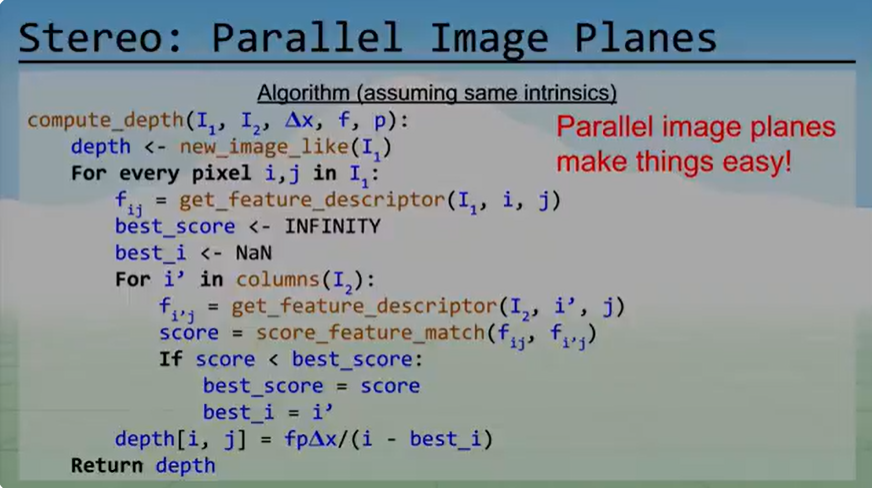

  - Best way to know which feature is the best match for depth calculations is using sum of squared difference.

**stereo 3D reconstruction using opencv**

In [ ]:
import cv2

# Load images (assuming left and right images are loaded as imgL and imgR)
imgL = cv2.imread('left.png', cv2.IMREAD_GRAYSCALE)
imgR = cv2.imread('right.png', cv2.IMREAD_GRAYSCALE)

# Stereo matching object (adjust parameters as needed)
stereo = cv2.StereoBM_create(numDisparities=16, blockSize=15) # or cv2.StereoSGBM_create(...)

# Compute the disparity map
disparity = stereo.compute(imgL, imgR)

# Normalize the disparity map for visualization
min_disp = disparity.min()
max_disp = disparity.max()
disp_norm = (disparity - min_disp) * 255 // (max_disp - min_disp)
disp_norm = disp_norm.astype('uint8')

# Apply a colormap for better visualization
disp_color = cv2.applyColorMap(disp_norm, cv2.COLORMAP_JET)

# Display the disparity map
cv2.imshow('Disparity Map', disp_color)
cv2.waitKey(0)
cv2.destroyAllWindows()

error: OpenCV(4.11.0) /io/opencv/modules/calib3d/src/stereobm.cpp:1190: error: (-211:One of the arguments' values is out of range) SADWindowSize must be odd, be within 5..255 and be not larger than image width or height in function 'compute'


## Lecture 10 -- Machine Learning for Computer Vision

- Why do we extract these features in images?
  - High level vision -- semantics and meaning
  - Make predictions about images -- learn things from data

- What is machine learning?
  - Algorithms to approximate functions
  - Supervised ;earning -- given inputs of a function, try to predict the output
  - semi-supervised -- number of labelled examples < number of examples
  - Unsupervised -- working with unlabelled data

- **Unsupervised learning:** eg, clustering (finding groups in database)
  - K-means clustering: Assumes points are close to other points in a group, far from points out of group
    - Algorithm:
      - randomly initialize cluster centers
      - calculate distance points <-> centers
      - assigns each point to closest center
      - update cluster centers
      - loop until converge
    
    - We can group image pixels based on color
  
- **Supervised Learning:** Want to estimate a function
  - Data often has noise due to randomness (random distribution of photons), mislabelled data, variables outside of model.
  - Therefore our function would not always be linear, might need more complex functions
  - Bias / Variance tradeoff:
    - Bias is error from assumptions model makes about data,  eg: linear or quadratic function
    - Variance: Algorithms sensitivity to noise, high variance hurts generalization
  
  - Linear regression: f*(x) = ax + b, f*(x) is the estimate function.

  - Nearest neighbor: prediction based on point closer to a point in the training data. easy to implement, easy to understand, low bias, high variance. powerful with lots of data. **weakness** is hard to scale, prone to overfitting

  - Classification: binary classification
    - partitioning data -; trees. very simple models, good for applications, eg medicine. predict based on what region new data falls in.
    - case study of classification used in computer vision; **Viola-Jones face detection**. *Haar features:* fast to compute.
    - *Boosting*: way to make weak classifiers better, train a weak classifier. final classifier is a linear combination of weak classifiers
    - Classification in two dimensions: Linear classifier
      - Logistic regression: maps all reals -> [0,1] probabilities
      - A linear classifier with a logistic function
      - Stochastic gradient descent with logistic regression.

**Linear regression with sklearn python**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Sample data
X = np.array([[1], [2], [3], [4], [5]])
y = np.array([2, 4, 5, 4, 5])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

**K Nearest neighbor with sklearn python**

In [ ]:
X = [[0], [1], [2], [3]]
y = [0, 0, 1, 1]
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X, y)
print(neigh.predict([[1.1]]))
print(neigh.predict_proba([[0.9]]))

[0]
[[0.66666667 0.33333333]]


**KMeans clustering using sckit-learn**

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
X = np.array([[1, 2], [1, 4], [1, 0],
              [10, 2], [10, 4], [10, 0]])
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(X)
kmeans.labels_
kmeans.cluster_centers_ , kmeans.predict([[0, 0], [12, 3]])

(array([[10.,  2.],
        [ 1.,  2.]]),
 array([1, 0], dtype=int32))

## Lecture 11 -- More Machine Learning for Computer Vision

- Loss function measures how wrong our model is, likelihood is how probable our model thinks or training data is.
- If we have multiple classes, we use an extension of logistic regression to the multiple classes
- for each class we have weights
- want to predict probability distributions. **important** we use **SOFTMAX**
- input is a vector and output is some probability distribution
- **Multinomial logistic regression**: probability of a data point belongs to  a class is the normalized, weighted sum of the input variables with the learned weights (using the SOFTMAX function)
  - Useful for handwriting recognition
- **Support Vector Machine:** Sort of finds the best linear classifier for some data with multiple linear classifiers
  - We want the classifier with maximum margin
  - SVM for person detection (case study)
    - An SVM trained on HOG features
    - Deformable parts model -- Key idea; objects are made of parts, and sometimes those parts move.

- What are the right features for machine learning?
  - Why not let the algorithm decide? --- idea of neural networks.
  - Feature engineering is the core problem of machine learning
  - A neural network has each output of a layer applied to by a function, and that will be the input for our next layer.
  - 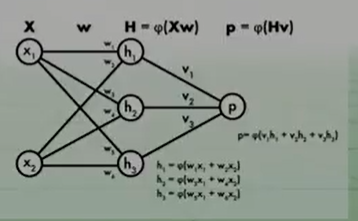

  - if activation function is not linear: *Universal approximation theorem*.
  - Neural networks are non-convex with no close form solution (can't find the derivative and set it to zero)
  - With gradient descent we calculate partial derivatives to learn the neural network

**SVM regression in sklearn**

In [ ]:
from sklearn import svm
X = [[0, 0], [2, 2]]
y = [0.5, 2.5]
regr = svm.SVR()
regr.fit(X, y)
regr.predict([[1, 1]])

array([1.5])

## Lecture 12 -- Neural Networks ⛓

- Use gradient descent to optimize our neural network
- How do we learn?
  - We adjust weights
  - We want to make our final output (p) larger by adjusting current weights in hidden layers
  - **Back propagation:** We calculate forward propagation through the network and find the error and the we backpropagate
  - *Algorithm for back propagation:*
    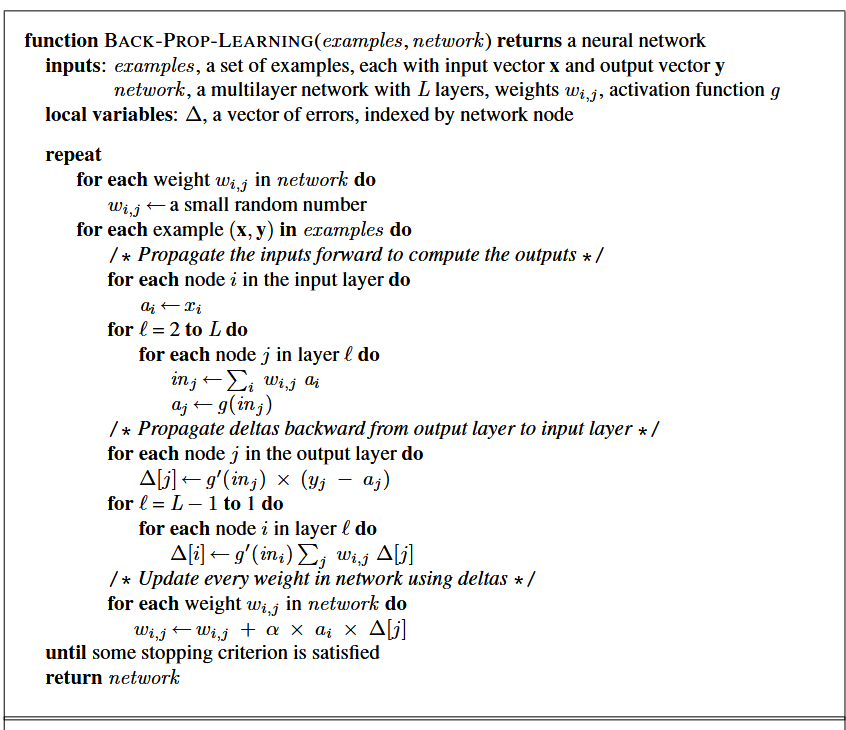
  
  - **Forward propagation:** predicting the input for a neuron based on weight outputs for some hidden layer.
    - we use a bunch examples of x inputs and those are multiplied with the weight w and z is predicted on that. (fun(z + b) = y, b is the bias, and y is the output)
  
  - **Weights update:** updating weights to get the required output.
    - Underfitting: model not powerful enough, too much bias
    - Overfitting: model too powerful, fits to noise, doesn't generalize well
    - Like SVMs, put limits on model that make it generalize it better
  

**example implementation of a neural network with numpy**

In [ ]:
import numpy as np

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.1):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate

        # Initialize weights and biases
        self.weights_input_hidden = np.random.randn(self.input_size, self.hidden_size)
        self.bias_hidden = np.zeros((1, self.hidden_size))
        self.weights_hidden_output = np.random.randn(self.hidden_size, self.output_size)
        self.bias_output = np.zeros((1, self.output_size))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def forward(self, X):
        # Hidden layer
        self.hidden_layer_input = np.dot(X, self.weights_input_hidden) + self.bias_hidden
        self.hidden_layer_output = self.sigmoid(self.hidden_layer_input)

        # Output layer
        self.output_layer_input = np.dot(self.hidden_layer_output, self.weights_hidden_output) + self.bias_output
        self.predicted_output = self.sigmoid(self.output_layer_input)
        return self.predicted_output

    def backward(self, X, y, predicted_output):
        # Calculate output layer error
        output_error = y - predicted_output
        output_delta = output_error * self.sigmoid_derivative(predicted_output)

        # Calculate hidden layer error
        hidden_layer_error = np.dot(output_delta, self.weights_hidden_output.T)
        hidden_layer_delta = hidden_layer_error * self.sigmoid_derivative(self.hidden_layer_output)

        # Update weights and biases
        self.weights_hidden_output += np.dot(self.hidden_layer_output.T, output_delta) * self.learning_rate
        self.bias_output += np.sum(output_delta, axis=0, keepdims=True) * self.learning_rate
        self.weights_input_hidden += np.dot(X.T, hidden_layer_delta) * self.learning_rate
        self.bias_hidden += np.sum(hidden_layer_delta, axis=0, keepdims=True) * self.learning_rate

    def train(self, X, y, epochs):
        for epoch in range(epochs):
            predicted_output = self.forward(X)
            self.backward(X, y, predicted_output)
            if (epoch + 1) % 1000 == 0:
                loss = np.mean(np.square(y - predicted_output))
                print(f"Epoch {epoch+1}, Loss: {loss:.4f}")

# Example Usage
if __name__ == "__main__":
    # Input data (XOR problem)
    X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    y = np.array([[0], [1], [1], [0]])

    # Create and train the neural network
    nn = NeuralNetwork(input_size=2, hidden_size=4, output_size=1, learning_rate=0.1)
    nn.train(X, y, epochs=10000)

    # Test the network
    print("\nPredictions after training:")
    for i in range(len(X)):
        prediction = nn.forward(X[i])
        print(f"Input: {X[i]}, Predicted Output: {prediction[0]:.4f}, Actual Output: {y[i][0]}")

## Lecture 13 -- Convolutional Neural Networks

- Common activation functions
  - Linear
  - logistic
  - tanh
  - rectified linear unit
  - Leaky RELU

  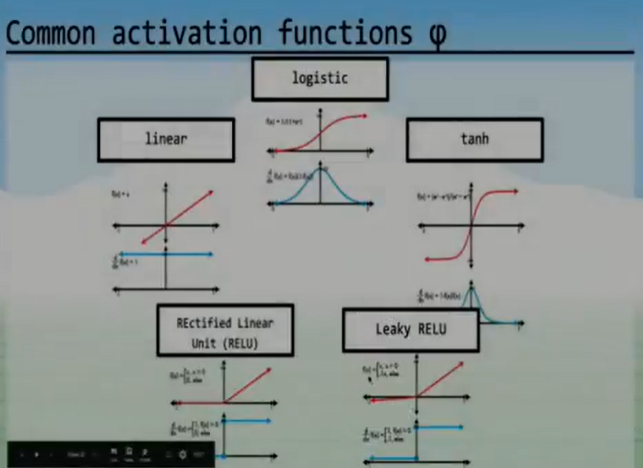

- 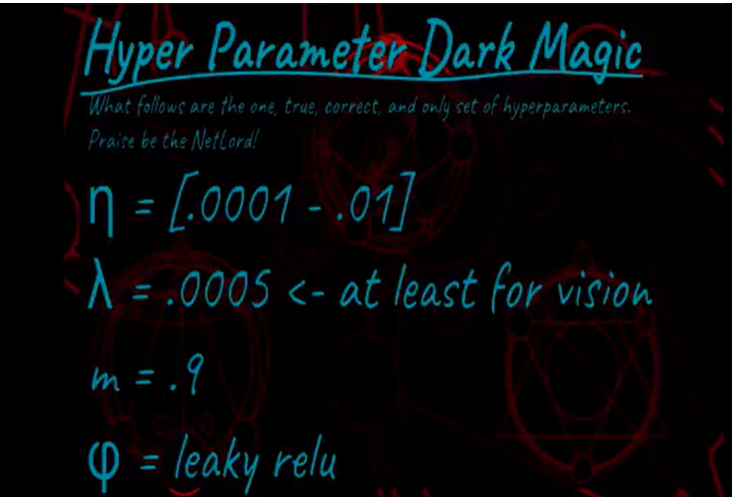


- **CNNs:**
  - Neural networks have too many weights, they're densely connected
  - Would we rather have a sparse connections? fewer weights, nearby regions connected, far apart not related

  - Convolutions; just weighted sums of small areas in image, weight sharing in different locations in image
  - Use CNNs instead of dense connections to process images
  - Imposes an assumption to our model: nearby pixels are related, far apart ones are less related -- increase in bias, decrease in variance
  - Convolutions have problems on edges
  - *Strides:* how far to move filter between applications
  - Im2col (image to column) -- take spatial blocks of image and put them into columns of a matrix. Now we just multiply it by our filter matrix to do convolutions.
  - Images are big; even a 256*256 image has hundreds of thousands of pixels and that's considered a small image. Aggregate information, maybe we don't need all of the image and can subsample without throwing away useful info.
  - **Pooling layer** takes an image and pool pixel values over a region and outputs an image, shrunk by a factor of the stride
  - 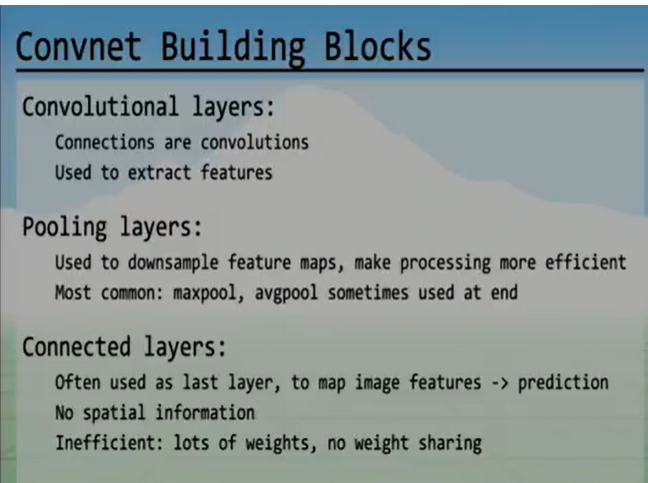

**Faster R-CNN with PyTorch**

Detected objects:
Box: tensor([ 681.6860,  429.2513, 1712.5475, 2078.4829]), Label: 1, Score: 0.99
Box: tensor([ 707.9194, 1022.1041, 2335.6560, 2092.6653]), Label: 1, Score: 0.99


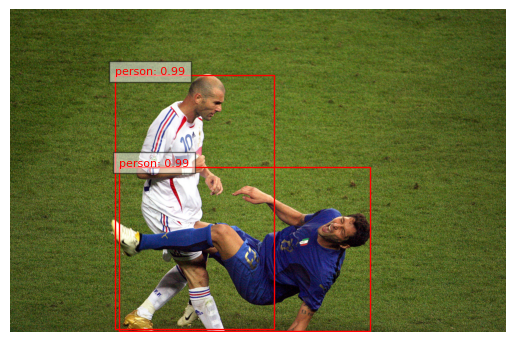

In [ ]:
import torch
import torchvision.models as models
import torchvision.transforms.functional as F
from PIL import Image, UnidentifiedImageError # Import UnidentifiedImageError
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import os # Import os module

# prompt: object detection with my resnet model

# For object detection, you typically use models like Faster R-CNN, SSD, or YOLO,
# not a standard classification ResNet. The provided ResNet is for classification.
#
# To perform object detection using a ResNet backbone, you would integrate it
# into a detection framework. PyTorch's `torchvision.models.detection`
# provides models that use ResNet as a backbone, like `fasterrcnn_resnet50_fpn`.
#
# The provided code already loads `fasterrcnn_resnet50_fpn`.
# Let's demonstrate how to use that for inference on an image.

# Load a pre-trained Faster R-CNN model with a ResNet50 backbone
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Fix: Load the pre-trained fasterrcnn_resnet50_fpn model directly
# This function returns the complete Faster R-CNN model with the specified backbone
detection_model = models.detection.fasterrcnn_resnet50_fpn(weights=models.detection.FasterRCNN_ResNet50_FPN_Weights.DEFAULT) # Use weights argument for pretrained

detection_model.eval() # Set the model to evaluation mode
detection_model.to(device) # Move the model to the same device as the classification model

# Assume you have an image loaded as a PyTorch tensor
# For demonstration, let's create a dummy image tensor (batch size 1, 3 channels, height, width)
# In a real scenario, you would load your image and preprocess it.
# Example: Load an image using Pillow and convert to tensor


# Download a sample image (you would replace this with your image path)
image_path = '/content/OB6ZC5QQBVE6XLZMOCO4NRUOTY.jpg'
download_url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/1/17/Arnold_Schwarzenegger_%28cropped%29.jpg/220px-Arnold_Schwarzenegger_%28cropped%29.jpg'

# Check if the file exists and is not empty before trying to open
# if not os.path.exists(image_path) or os.path.getsize(image_path) == 0:
#     print(f"Image file not found or is empty at {image_path}. Attempting to download...")
#     !wget {download_url} -O {image_path}
#     # Re-check after download
#     if not os.path.exists(image_path) or os.path.getsize(image_path) == 0:
#          raise FileNotFoundError(f"Failed to download image from {download_url} to {image_path}")


try:
    image = Image.open(image_path).convert("RGB")
except UnidentifiedImageError as e:
    print(f"Error opening image file {image_path}: {e}")
    print("The file might be corrupted or not a valid image format.")
    # You might want to try redownloading or using a different image here
    raise # Re-raise the exception after printing the message


image_tensor = F.to_tensor(image).unsqueeze(0).to(device) # Add batch dimension and move to device

# Perform inference
with torch.no_grad(): # Disable gradient calculation for inference
    predictions = detection_model(image_tensor)

# The predictions will be a list of dictionaries, one for each image in the batch.
# Each dictionary contains 'boxes', 'labels', and 'scores'.
boxes = predictions[0]['boxes']
labels = predictions[0]['labels']
scores = predictions[0]['scores']

# You can filter predictions based on a confidence threshold
confidence_threshold = 0.7
high_confidence_predictions = [
    {'box': box, 'label': label, 'score': score}
    for box, label, score in zip(boxes, labels, scores)
    if score > confidence_threshold
]

print("Detected objects:")
for pred in high_confidence_predictions:
    print(f"Box: {pred['box']}, Label: {pred['label']}, Score: {pred['score']:.2f}")

# To visualize the results, you would draw the bounding boxes on the image
# using a library like OpenCV or Matplotlib.

# Example of visualizing using Matplotlib


# Convert tensor back to PIL image for drawing
image_pil = F.to_pil_image(image_tensor.squeeze(0).cpu())

fig, ax = plt.subplots(1)
ax.imshow(image_pil)

# Define a dictionary for common COCO labels (you might need a full list or your custom labels)
# This is just a partial example based on common object detection datasets
# You can get the full list of COCO labels used by the torchvision models online.
coco_labels = {
    1: 'person', 2: 'bicycle', 3: 'car', 4: 'motorcycle', 5: 'airplane',
    6: 'bus', 7: 'train', 8: 'truck', 9: 'boat', 10: 'traffic light',
    11: 'fire hydrant', 13: 'stop sign', 14: 'parking meter', 15: 'bench',
    16: 'bird', 17: 'cat', 18: 'dog', 19: 'horse', 20: 'sheep', 21: 'cow',
    22: 'elephant', 23: 'bear', 24: 'zebra', 25: 'giraffe', 27: 'backpack',
    28: 'umbrella', 31: 'handbag', 32: 'tie', 33: 'suitcase', 34: 'frisbee',
    35: 'skis', 36: 'snowboard', 37: 'sports ball', 38: 'kite', 39: 'baseball bat',
    40: 'baseball glove', 41: 'skateboard', 42: 'surfboard', 43: 'tennis racket',
    44: 'bottle', 46: 'wine glass', 47: 'cup', 48: 'fork', 49: 'knife', 50: 'spoon',
    51: 'bowl', 52: 'banana', 53: 'apple', 54: 'sandwich', 55: 'orange', 56: 'broccoli',
    57: 'carrot', 58: 'hot dog', 59: 'pizza', 60: 'donut', 61: 'cake', 62: 'chair',
    63: 'couch', 64: 'potted plant', 65: 'bed', 67: 'dining table', 70: 'toilet',
    72: 'tv', 73: 'laptop', 74: 'mouse', 75: 'remote', 76: 'keyboard', 77: 'cell phone',
    78: 'microwave', 79: 'oven', 80: 'toaster', 81: 'sink', 82: 'refrigerator',
    84: 'book', 85: 'clock', 86: 'vase', 87: 'scissors', 88: 'teddy bear', 89: 'hair drier',
    90: 'toothbrush'
}


for pred in high_confidence_predictions:
    box = pred['box'].cpu().numpy()
    label = pred['label'].item()
    score = pred['score'].item()

    x_min, y_min, x_max, y_max = box
    width = x_max - x_min
    height = y_max - y_min

    # Create a Rectangle patch
    rect = patches.Rectangle(
        (x_min, y_min), width, height,
        linewidth=1, edgecolor='r', facecolor='none'
    )

    # Add the patch to the Axes
    ax.add_patch(rect)

    # Add label and score
    label_text = f"{coco_labels.get(label, f'Class {label}')}: {score:.2f}"
    plt.text(x_min, y_min - 5, label_text, color='red', fontsize=8, bbox=dict(facecolor='white', alpha=0.5))

plt.axis('off') # Hide axes
plt.show()

# Note: The `model` (classification ResNet) defined earlier in the provided
# code snippet is separate from the `detection_model` (Faster R-CNN with
# ResNet backbone). The task specifically asks for object detection,
# which the classification model cannot perform directly. We are using
# the Faster R-CNN model which leverages a ResNet backbone.

## Lecture 14 -- Network Architectures

- LeNet -- sort of first Convnet (CNN) 1998
  - Has all elements of modern cnn
- AlexNet: first good network to work on real-life IMAGENET data
- GPUs: How modern CNNs are possible
- We can feed images into our networks and see which ones activate certain neurons
- Also (another idea), instead of optimizing network, we can do gradient descent on the image too
- 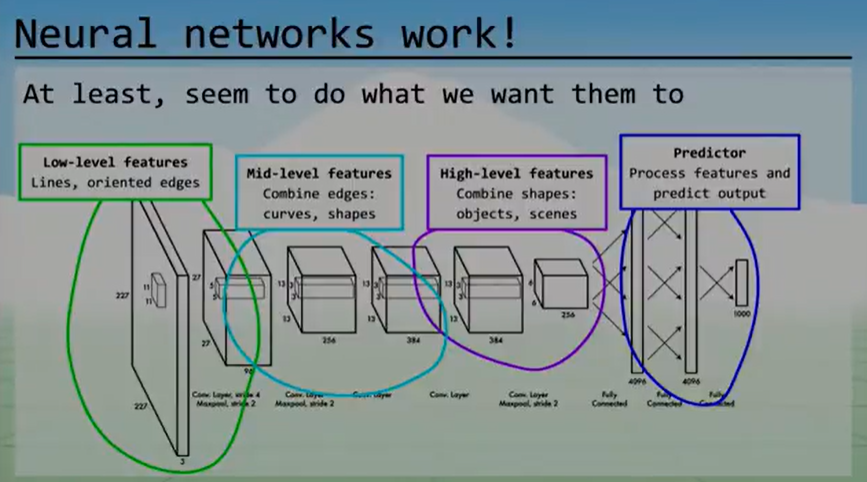

- Another--**GoogleNet**  
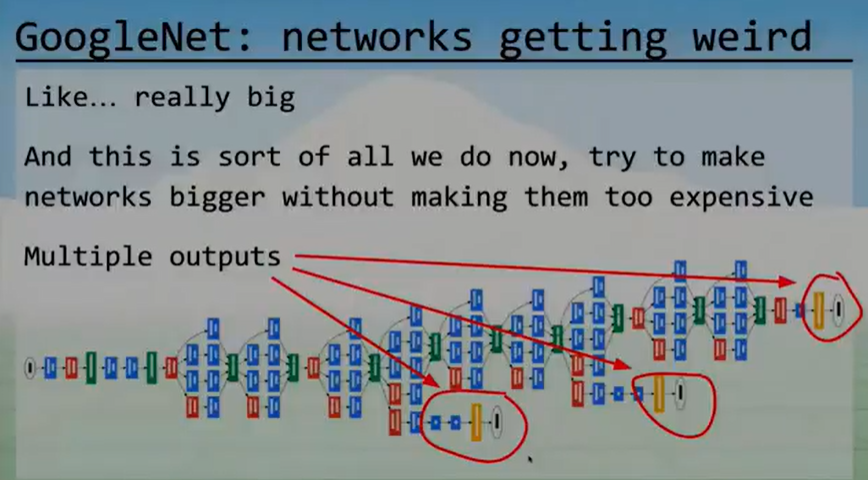



## Lecture 15 -- Object Detection

- **Grouped convolutions**
  - Split up input feature map into groups
  - run convs on groups independently
  - recombine
- **ResNext** replace 3X3 blocks (from ResNet) with larger grouped convs
- **Object Detection:**
  - *Semantic segmentation*:
    - Semantic segmentation is a computer vision task that assigns a class label to pixels using a deep learning (DL) algorithm.
    - A convolution network that encodes coarse features to detect features of objects
    - A deconvolution network takes these coarse features and turns them into a segmentation mask
  
  - ***U-net/Segnet:*** Predicts objects based on the features from an image (in the intermediate layer neurons)
  - *Deformable parts models*: Training SVM on top of HOG features
  - Object detection has a bunch of classes and multiple objects per images. Can't just use accuracy.  
  "Correct" bounding boxes: **Intersection / Union > 0.5**   
  - Scoring object dectection:  
    - Recall:  
  Correct bounding boxes / total ground-truth boxes  
    - Precision:  
  Correct bounding boxes / total predicted boxes  
    - Only the most confident predictions: High precision, low recall  
    - All the predictions: Low precision, high recall
  
  - Pascal VOC: one of the first large dectection datasets
  - R-CNN:
  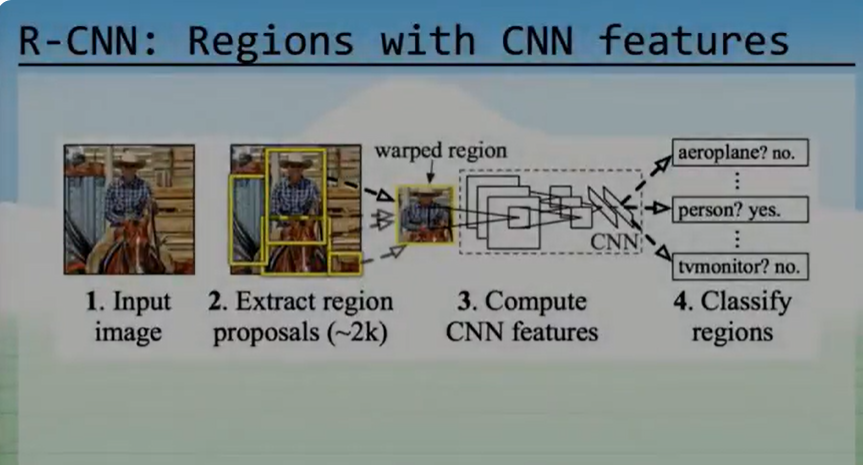




- Selective search: fewer proposal

**Semantic segmentation with DeepLabV3**

Downloading: "https://download.pytorch.org/models/deeplabv3_resnet101_coco-586e9e4e.pth" to /root/.cache/torch/hub/checkpoints/deeplabv3_resnet101_coco-586e9e4e.pth
100%|██████████| 233M/233M [00:01<00:00, 131MB/s]


--2025-08-04 20:23:14--  https://images.unsplash.com/photo-1503023345310-bd7c1de61c7d?q=80&w=1000&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxzZWFyY2h8Mnx8aHVtYW58ZW58MHx8MHx8fDA%3D
Resolving images.unsplash.com (images.unsplash.com)... 151.101.2.208, 151.101.66.208, 151.101.130.208, ...
Connecting to images.unsplash.com (images.unsplash.com)|151.101.2.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178359 (174K) [image/jpeg]
Saving to: ‘person.jpg’

person.jpg          100%[===================>] 174.18K  --.-KB/s    in 0.02s   

2025-08-04 20:23:15 (7.13 MB/s) - ‘person.jpg’ saved [178359/178359]



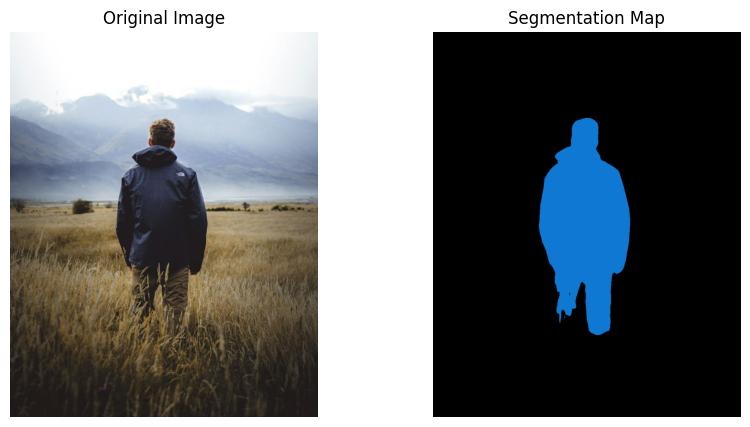

In [ ]:
import torch
import torchvision.models.segmentation as segmentation
from PIL import Image
import torchvision.transforms as T
import matplotlib.pyplot as plt
import numpy as np

# Load a pre-trained DeepLabV3 model
model = segmentation.deeplabv3_resnet101(weights=segmentation.DeepLabV3_ResNet101_Weights.DEFAULT)
model.eval()

# Example usage with a sample image
# Download a sample image
!wget -O "person.jpg" "https://images.unsplash.com/photo-1503023345310-bd7c1de61c7d?q=80&w=1000&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxzZWFyY2h8Mnx8aHVtYW58ZW58MHx8MHx8fDA%3D"

input_image = Image.open("person.jpg")
preprocess = T.Compose([
    T.ToTensor(),
    T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model

# move the input and model to GPU for speed if available
if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    model.to('cuda')

with torch.no_grad():
    output = model(input_batch)['out'][0]
output_predictions = output.argmax(0)

# create a color pallette, selecting a color for each class
palette = torch.tensor([2**25 - 1, 2**15 - 1, 2**21 - 1])
colors = torch.as_tensor([i for i in range(21)])[:, None] * palette
colors = (colors % 255).numpy().astype("uint8")

# plot the semantic segmentation predictions of 21 classes in each color
r = Image.fromarray(output_predictions.byte().cpu().numpy()).resize(input_image.size)
r.putpalette(colors)

# display the image and its segmentation map
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.imshow(input_image)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(r)
plt.title("Segmentation Map")
plt.axis('off')

plt.show()

# Lecture 16 -- Detection and Instance Segementation

- **YOLO** object detection: evaluates a single neural network instead of doing sort of a bunch of passes through a neural network
- Yolo divides image into grids and predict the center grid and draws boxes around them. Se we end up with a bunch of these boxes and assign confidences to them.
- Also class probabilities
- Final bounding boxes based on thresholding and some non-max supression
- YOLO loss function:
  - L(confidence): binary cross-entropy
  - L(localization): RMSE
  - L(classification): multi-class cross-entropy or 1 v all binary cross-entropy
- COCO (Common Objects In COntext) dataset is larger than Pascal dataset
-Segmentation vs Detection:
  - Segmentation: Pixel-level labels
  - Detection: bounding box labels
- Instance segmentation:
 - Combines both: given an image, produce instance-level segmentation
 - which class does each pixel belong to and also which instance
- Mask R-CNN: similar to R-CNN but predict mask instead of box

**YOLOv5 from ultralytics for object detection using PyTorch (example implementation)**

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2025-8-5 Python-3.11.13 torch-2.6.0+cu124 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


--2025-08-05 19:11:34--  https://ultralytics.com/images/zidane.jpg
Resolving ultralytics.com (ultralytics.com)... 75.2.70.75, 99.83.190.102
Connecting to ultralytics.com (ultralytics.com)|75.2.70.75|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.ultralytics.com/images/zidane.jpg [following]
--2025-08-05 19:11:35--  https://www.ultralytics.com/images/zidane.jpg
Resolving www.ultralytics.com (www.ultralytics.com)... 104.18.40.102, 172.64.147.154, 2606:4700:4400::6812:2866, ...
Connecting to www.ultralytics.com (www.ultralytics.com)|104.18.40.102|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/ultralytics/assets/releases/download/v0.0.0/zidane.jpg [following]
--2025-08-05 19:11:35--  https://github.com/ultralytics/assets/releases/download/v0.0.0/zidane.jpg
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
image 1/1: 720x1280 2 persons, 1 tie, 1 cell phone
Speed: 17.2ms pre-process, 246.0ms inference, 3.4ms NMS per image at shape (1, 3, 384, 640)


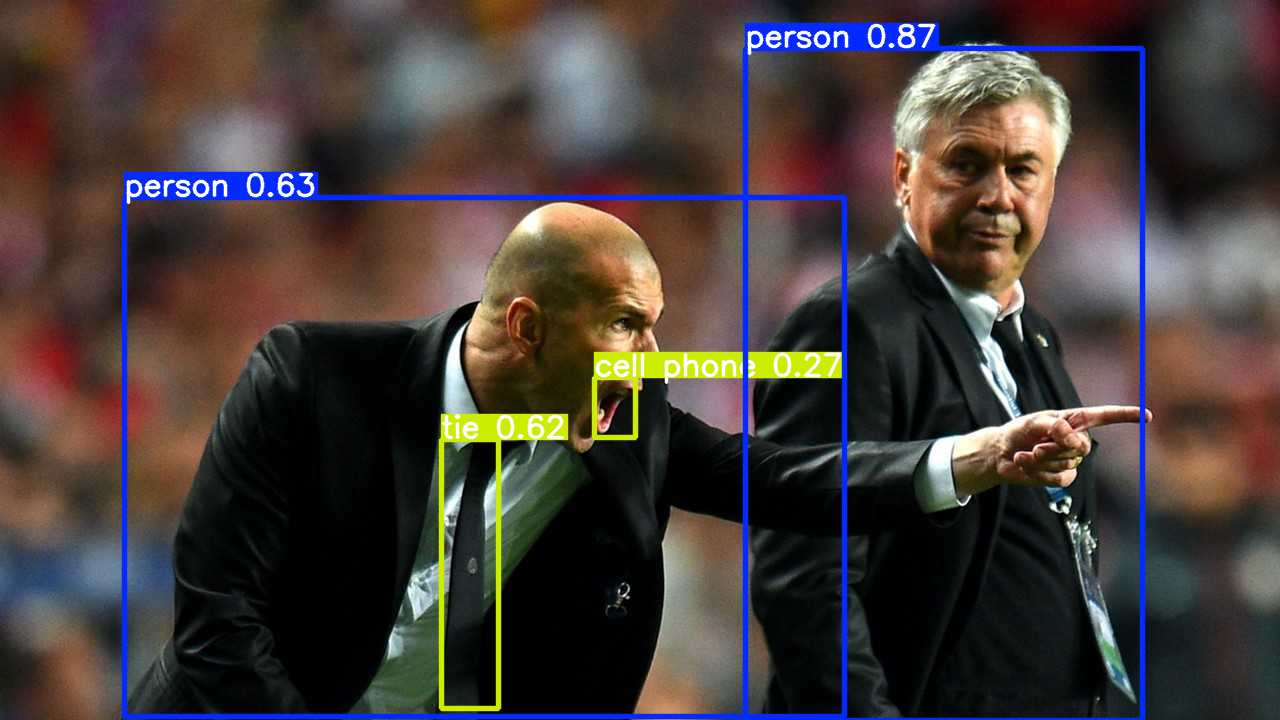

Saved 1 image to runs/detect/exp2


In [ ]:
import torch
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Load a pre-trained YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

# Download a sample image
!wget -O "zidane.jpg" "https://ultralytics.com/images/zidane.jpg"
img_path = 'zidane.jpg'
img = Image.open(img_path)

# Perform inference
results = model(img)

# Results
results.print()  # print results to console
results.show()   # display results
results.save()   # save as results.jpg

# To display in matplotlib
fig, ax = plt.subplots(1)
ax.imshow(img)

# Add bounding boxes
for *xyxy, conf, cls in results.xyxy[0]:
    x_min, y_min, x_max, y_max = xyxy
    width = x_max - x_min
    height = y_max - y_min
    rect = patches.Rectangle((x_min, y_min), width, height, linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
    label = f'{model.names[int(cls)]} {conf:.2f}'
    plt.text(x_min, y_min - 5, label, color='red', fontsize=8, bbox=dict(facecolor='white', alpha=0.5))

plt.axis('off')
plt.show()

**Mask R-CNN implementation example**

In [ ]:
import torch
import torchvision.models.detection as detection
import torchvision.transforms.functional as F
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import numpy as np

# Load a pre-trained Mask R-CNN model
model = detection.maskrcnn_resnet50_fpn(weights=detection.MaskRCNN_ResNet50_FPN_Weights.DEFAULT)
model.eval()

# Download a sample image
!wget -O "new_image.jpg" "https://images.unsplash.com/photo-1518791841217-8f162f1e1131?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=800&q=60"
img_path = 'new_image.jpg'
img = Image.open(img_path).convert("RGB")

# Preprocess the image
image_tensor = F.to_tensor(img).unsqueeze(0)

# Perform inference
with torch.no_grad():
    predictions = model(image_tensor)

# Draw the results
img_draw = img.copy()
draw = ImageDraw.Draw(img_draw)

for i in range(len(predictions[0]['masks'])):
    score = predictions[0]['scores'][i]
    if score > 0.5:  # Confidence threshold
        mask = predictions[0]['masks'][i, 0].mul(255).byte().cpu().numpy()
        color = tuple(np.random.randint(0, 256, 3))

        # Create a colored mask image
        colored_mask = Image.new('RGB', img.size, color)
        mask_image = Image.fromarray(mask)

        # Apply the mask
        img_draw.paste(colored_mask, (0, 0), mask_image)

        # Draw bounding box
        box = predictions[0]['boxes'][i].cpu().numpy()
        draw.rectangle(box, outline=color, width=3)


plt.figure(figsize=(12, 12))
plt.imshow(img_draw)
plt.axis('off')
plt.show()

--2025-08-05 20:05:16--  https://images.unsplash.com/photo-1518791841217-8f162f1e1131?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=800&q=60
Resolving images.unsplash.com (images.unsplash.com)... 151.101.2.208, 151.101.66.208, 151.101.130.208, ...
Connecting to images.unsplash.com (images.unsplash.com)|151.101.2.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64512 (63K) [image/jpeg]
Saving to: ‘new_image.jpg’

new_image.jpg       100%[===================>]  63.00K  --.-KB/s    in 0.03s   

2025-08-05 20:05:16 (2.00 MB/s) - ‘new_image.jpg’ saved [64512/64512]



# Lecture 17 -- Vision and Language